In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist,fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape) 
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


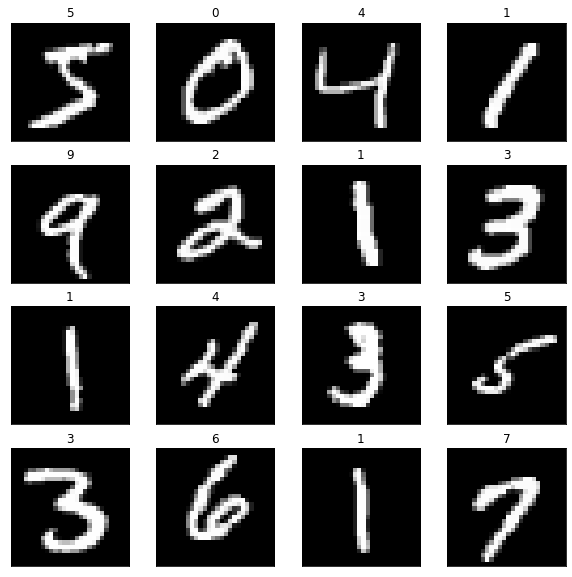

In [4]:
plt.figure(figsize=(10,10))
for i in range(16):  # i=0,1,2,...,15
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],'gray')
    plt.title(y_train[i])
plt.show()

In [5]:
x_train = x_train[:5000,:,:]
x_test = x_test[:1000,:,:]
y_train = y_train[:5000]
y_test = y_test[:1000]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28)
(1000, 28, 28)
(5000,)
(1000,)


In [6]:
# Normalize
x_train = x_train/255
x_test = x_test/255

# Reshape
x_train = x_train.reshape(5000, 28, 28,1)
x_test = x_test.reshape(1000, 28, 28,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28, 1)
(1000, 28, 28, 1)
(5000,)
(1000,)


In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# datagen = ImageDataGenerator(rotation_range=0.3)

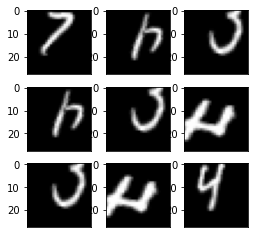

In [10]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                            rotation_range=30,width_shift_range=0.3,
                            height_shift_range=0.3,zoom_range=0.2)

for x, y in datagen.flow(x_train, y_train):
    fig, ax = plt.subplots(3, 3, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(x[i+j], cmap=plt.get_cmap("gray"))
            ax[i][j].set_xticks([])
            ax[i][j].set_xticks([])
            
    plt.show()
    break

In [11]:
train_data = datagen.flow(x_train, y_train)

In [12]:
datagen_test = ImageDataGenerator(width_shift_range=0.1)

test_data = datagen_test.flow(x_test,y_test)

### Model Architecture

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, Adadelta, Adagrad, RMSprop

In [20]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [21]:
m1 = Sequential()
m1.add(Conv2D(64,(3,3),activation='relu',input_shape=(28, 28, 1)))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(32,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dense(32,activation='relu'))
m1.add(Dense(10,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [ ]:
# Deprecated Function
# h1 = m1.fit_generator(train_data,epochs=15,validation_data=test_data)

In [23]:
h1 = m1.fit(train_data,epochs=15,validation_data=test_data)

Train for 157 steps, validate for 32 steps
Epoch 1/15
157/157 [==============================] - 21s 136ms/step - loss: 2.2457 - accuracy: 0.1640 - val_loss: 1.9801 - val_accuracy: 0.2720
Epoch 2/15
157/157 [==============================] - 20s 127ms/step - loss: 2.0222 - accuracy: 0.2486 - val_loss: 1.6768 - val_accuracy: 0.3500
Epoch 3/15
157/157 [==============================] - 20s 129ms/step - loss: 1.8730 - accuracy: 0.3050 - val_loss: 1.6038 - val_accuracy: 0.3820
Epoch 4/15
157/157 [==============================] - 20s 127ms/step - loss: 1.7637 - accuracy: 0.3524 - val_loss: 1.4542 - val_accuracy: 0.4500
Epoch 5/15
157/157 [==============================] - 20s 128ms/step - loss: 1.7084 - accuracy: 0.3744 - val_loss: 1.4719 - val_accuracy: 0.4210
Epoch 6/15
157/157 [==============================] - 20s 127ms/step - loss: 1.6116 - accuracy: 0.4194 - val_loss: 1.4142 - val_accuracy: 0.4500
Epoch 7/15
157/157 [==============================] - 20s 129ms/step - loss: 1.5694 - a